In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Number of rows and columns

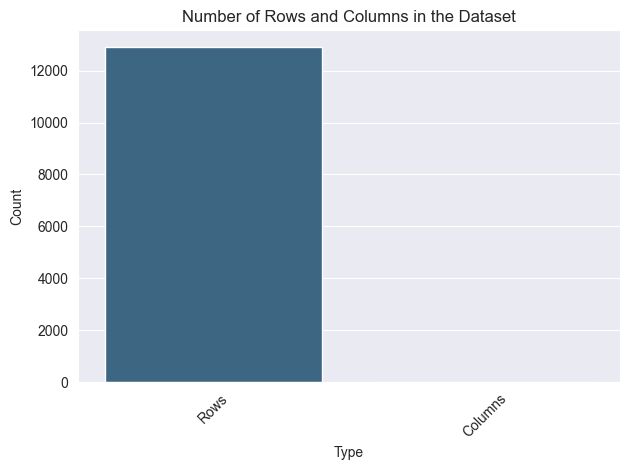

In [18]:

df = pd.read_csv("data/cleaned_dataset.csv")

# Count number of rows and columns
rows_count = df.shape[0]
columns_count = df.shape[1]

# Prepare data for plotting
counts = pd.DataFrame({
    'Type': ['Rows', 'Columns'],
    'Count': [rows_count, columns_count]
})

sns.barplot(data=counts, x='Type', y='Count', palette='viridis', hue='Type')

plt.title('Number of Rows and Columns in the Dataset')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Completeness

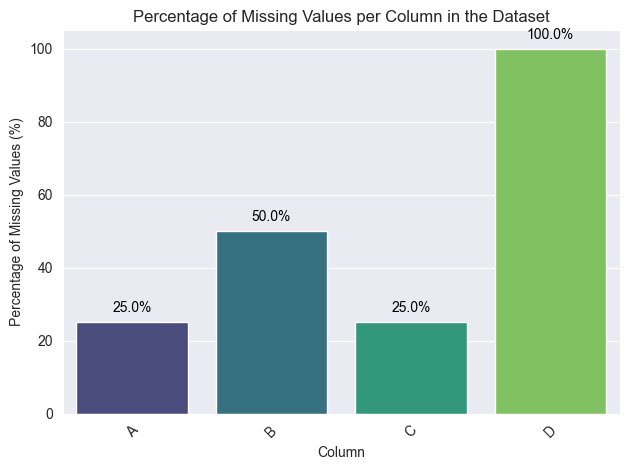

In [17]:
data = {
    'A': [1, 2, None, 4],
    'B': [None, 5, None, 7],
    'C': ['a', 'b', 'c', None],
    'D': [None, None, None, None]
}
df = pd.DataFrame(data)

missing_values = df.isna().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

ax = sns.barplot(data=missing_data, x='Column', y='Missing Percentage', palette='viridis', hue="Column")

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.1f}%', 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5),
                textcoords='offset points')
    
plt.title('Percentage of Missing Values per Column in the Dataset')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, shape
from shapely import wkt
import ast
import contextily as ctx
import json

In [85]:

with open('data/georef-belgium-postal-codes.geojson', 'r') as file:
    coords = json.load(file)


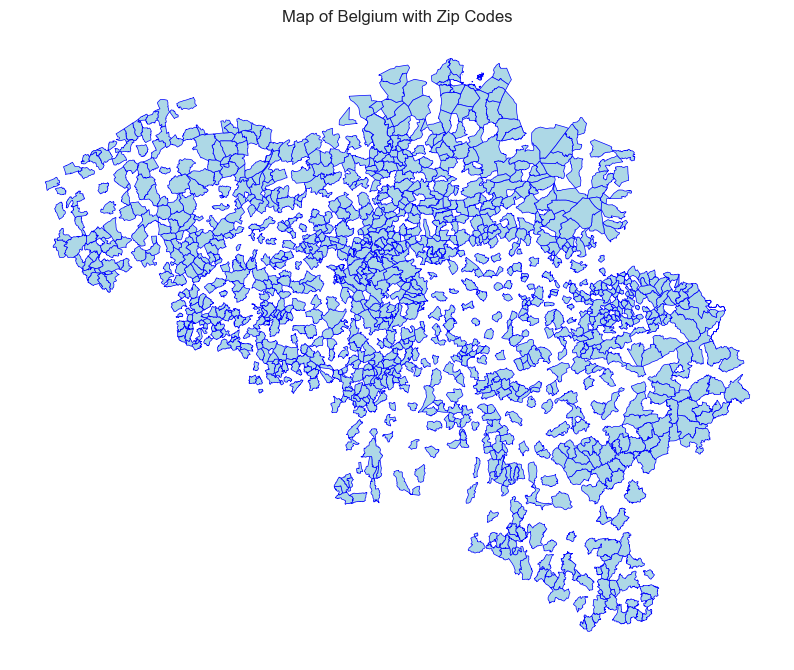

In [88]:
try:
    zipcodes_gdf = gpd.read_file('data/georef-belgium-postal-codes.geojson')  
except Exception as e:
    print(f"Error loading GeoJSON: {e}")

# Check the type of zipcodes_gdf to ensure it is a GeoDataFrame
if isinstance(zipcodes_gdf, gpd.GeoDataFrame):
    # Create a basic plot of the zip codes
    fig, ax = plt.subplots(figsize=(10, 10))
    zipcodes_gdf.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5)

    plt.title('Map of Belgium with Zip Codes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.axis('off')  # Optional: Turn off the axis
    plt.show()
else:
    print("The variable zipcodes_gdf is not a GeoDataFrame.")

In [90]:
try:
    gdf = gpd.read_file('data/georef-belgium-postal-codes.geojson')  
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    exit()

# Basic Information about the GeoDataFrame
print("=== Basic Information ===")
print(f"Number of records: {len(gdf)}")
print(f"Columns: {gdf.columns.tolist()}")

# Check for presence/absence of values in each column
print("\n=== Presence/Absence of Values ===")
missing_summary = gdf.isnull().sum()
present_summary = gdf.notnull().sum()

# Combine results for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_summary, 'Present Values': present_summary})
missing_info['Total Values'] = len(gdf)
missing_info['Missing Percentage'] = (missing_info['Missing Values'] / missing_info['Total Values']) * 100

print(missing_info[missing_info['Missing Values'] > 0])  # Show only columns with missing values

# Additional insight on geometry presence
print("\n=== Geometry Presence ===")
print(f"Total records with valid geometry: {gdf.geometry.notnull().sum()} out of {len(gdf)}")
print(f"Total records with missing geometry: {gdf.geometry.isnull().sum()} out of {len(gdf)}")

=== Basic Information ===
Number of records: 1231
Columns: ['geo_point_2d', 'geo_shape', 'postcode', 'special_code', 'smun_code', 'reg_code', 'prov_code', 'arr_code', 'mun_code', 'smun_area_code', 'smun_off_language', 'smun_name_fr', 'smun_name_nl', 'smun_name_de', 'reg_name_de', 'reg_name_nl', 'reg_name_fr', 'prov_name_de', 'prov_name_nl', 'prov_name_fr', 'arr_name_de', 'arr_name_nl', 'arr_name_fr', 'mun_name_de', 'mun_name_nl', 'mun_name_fr', 'geometry']

=== Presence/Absence of Values ===
                   Missing Values  Present Values  Total Values  \
geo_point_2d                    1            1230          1231   
geo_shape                    1231               0          1231   
smun_code                       2            1229          1231   
reg_code                        2            1229          1231   
prov_code                      50            1181          1231   
arr_code                        2            1229          1231   
mun_code                        2 

In [91]:
file_path = 'data/georef-belgium-postal-codes.geojson'
try:
    zipcodes_gdf = gpd.read_file(file_path)  
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    exit()

# Check basic info
print("=== Basic Information ===")
print(zipcodes_gdf.head())  # Show first few records
print(zipcodes_gdf.info())  # Summary of the GeoDataFrame

# Check for missing geometries
missing_geometries = zipcodes_gdf[zipcodes_gdf.geometry.isnull()]
print("\n=== Missing Geometries ===")
print(missing_geometries)

=== Basic Information ===
                                        geo_point_2d geo_shape postcode  \
0  { "lon": 4.9783055252481603, "lat": 50.1452292...      None     5571   
1  { "lon": 4.8230406770976213, "lat": 50.5180215...      None     5080   
2  { "lon": 4.8445957515397984, "lat": 50.1654917...      None     5543   
3  { "lon": 5.2482180291084672, "lat": 51.0900989...      None     3581   
4  { "lon": 5.173248093354319, "lat": 51.04768605...      None     3583   

   special_code smun_code reg_code prov_code arr_code mun_code smun_area_code  \
0             0    91013H    03000     90000    91000    91013            BEL   
1             0    92141A    03000     90000    92000    92141            BEL   
2             0    91142E    03000     90000    91000    91142            BEL   
3             0    71004D    02000     70000    71000    71004            BEL   
4             0    71004B    02000     70000    71000    71004            BEL   

   ... prov_name_de prov_name_nl   p

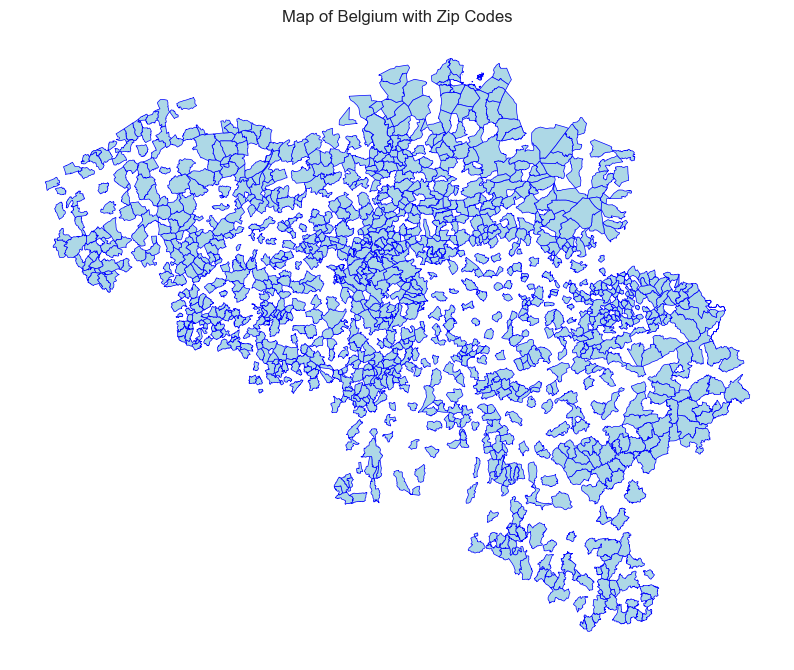

In [92]:
if isinstance(zipcodes_gdf, gpd.GeoDataFrame):
    # Create a basic plot of the zip codes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot all geometries
    zipcodes_gdf.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5)

    plt.title('Map of Belgium with Zip Codes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.axis('off')  # Optional: Turn off the axis
    plt.show()
else:
    print("The variable zipcodes_gdf is not a GeoDataFrame.")

In [94]:
unique_postal_codes = zipcodes_gdf['postcode'].unique()  # Replace with actual postal code column
print("Unique Postal Codes in the GeoDataFrame:")
print(unique_postal_codes)

Unique Postal Codes in the GeoDataFrame:
['5571' '5080' '5543' ... '2850' '2491' '2480']


In [ ]:
known_postal_codes = ['List', 'Of', 'Known', 'Postal', 'Codes']
missing_postal_codes = set(known_postal_codes) - set(unique_postal_codes)
print("Missing Postal Codes:")
print(missing_postal_codes)